# Development of the Test

See `Study Note 4`.

# Testing

We use the Weierstrass function to test our Holder continuity test.

## Test applied to Weierstrass function

*Property of Weierstrass Function*

It is convenient to write the Weierstrass function equivalently as
$$
W_\alpha(x)=\sum_{n=0}^{\infty} b^{-n \alpha} \cos \left(b^n \pi x\right)
$$
for $\alpha=-\frac{\ln (a)}{\ln (b)}$. Then $W_{\mathrm{a}}(x)$ is Hölder continuous of exponent a, which is to say that there is a constant $C$ such that
$$
\left|W_\alpha(x)-W_\alpha(y)\right| \leq C|x-y|^\alpha
$$
for all $x$ and $y .^{[10]}$ Moreover, $W_1$ is Hölder continuous of all orders $a<1$ but not Lipschitz continuous.

In [ ]:
# Assumptions
# 1. The process is defined in [0,1].
# 2. The process accepts as input a float number.
import numpy as np
from matplotlib import pyplot as plt

W = np.load('ssrw-1e8.npy')
NW = len(W)

In [ ]:
def process(x: float) -> float:
    return 2*x

def ssrw_process(x:float) -> float:
    if x < 0: 
        raise ValueError('x must be in [0,1]')
    if x > 1:
        raise ValueError('x must be in [0,1]')
    x = x # fix zero devision
    return W[int(x*NW)-1]*(NW)**(-1/2)

alpha = 0.7
def weierstrass(x,Nvar = 200):
    we=0
    
    b = 3
    for n in range(0,Nvar):
        we=we+np.cos(b**n*np.pi*x)/b**(n* alpha)
    return we

process = weierstrass
# We use the weierstrass function as a test case.
# It is continuous, not differentiable, and does
# not have other properties of BM such as normality
# and memorylessness.

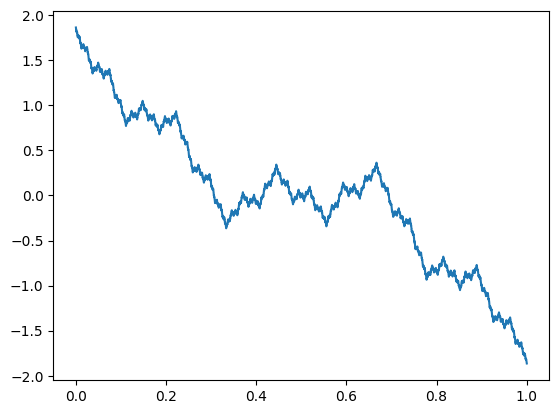

In [ ]:
# Plot the process
x = np.linspace(0,1,10000)
y = np.vectorize(process)(x)
plt.plot(x,y)

<ipython-input-145-6cc139f171fc>:20: RuntimeWarning: divide by zero encountered in log
  a = np.log(np.abs(dy)) / np.tile(np.log(np.abs(dx)), (n,1)).T


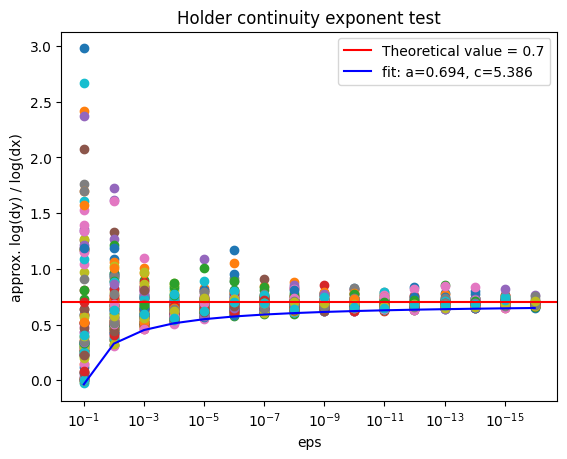

In [ ]:
# Test 2: Hölder continuity exponent

n = 100
eps = np.array([
    1e-1, 1e-2, 1e-3, 1e-4, 
    1e-5, 1e-6, 1e-7, 1e-8, 
1e-9, 1e-10, 1e-11, 1e-12, 
1e-13, 1e-14, 1e-15, 1e-16, 
# 1e-17, 1e-18, 1e-19, 1e-20
])
m = len(eps)
x = np.random.rand(n) * 0.8 + 0.1
dx = eps
x1 = np.tile(x, (m,1)) - np.tile(dx/2, (n,1)).T
x2 = np.tile(x, (m,1)) + np.tile(dx/2, (n,1)).T
y1 = np.vectorize(process)(x1)
y2 = np.vectorize(process)(x2)
dy = y2 - y1
a = np.log(np.abs(dy)) / np.tile(np.log(np.abs(dx)), (n,1)).T
plt.plot(eps, a, 'o', 
) # should not converge
#log scale
plt.xscale('log')
# plt.yscale('log')
# invert x axis
plt.gca().invert_xaxis()
# draw horizontal line at y=0.5
plt.axhline(y=alpha, color='r', linestyle='-', label = f'Theoretical value = {alpha}')

plt.title('Holder continuity exponent test')
plt.xlabel('eps')
plt.ylabel('approx. log(dy) / log(dx)')
plt.legend()

# curve fitting
inf_a = np.min(a, axis=1)
# fit a curve
from scipy.optimize import curve_fit
def func(eps, a, c):
    return a + np.log(c) / (np.log(eps))
xdata = eps
ydata = inf_a
popt, pcov = curve_fit(func, xdata, ydata)
# plt.plot(xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'b-',
label='fit: a=%5.3f, c=%5.3f' % tuple(popt))
# plt.xscale('log')
# plt.yscale('log')
# invert x axis
# plt.gca().invert_xaxis()
# draw horizontal line at y=0.5

plt.legend()
plt.show()

<ipython-input-146-35881030b1b8>:22: RuntimeWarning: divide by zero encountered in log
  a = np.log(np.abs(dy)) / np.tile(np.log(np.abs(dx)), (n,1)).T


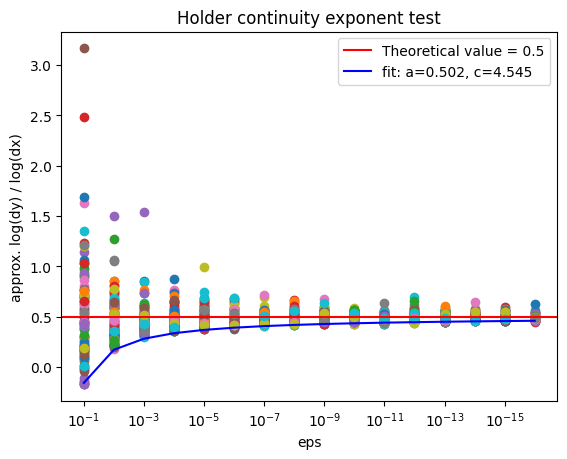

In [ ]:
# Test 2: Hölder continuity exponent

alpha = 0.5

n = 100
eps = np.array([
    1e-1, 1e-2, 1e-3, 1e-4, 
    1e-5, 1e-6, 1e-7, 1e-8, 
1e-9, 1e-10, 1e-11, 1e-12, 
1e-13, 1e-14, 1e-15, 1e-16, 
# 1e-17, 1e-18, 1e-19, 1e-20
])
m = len(eps)
x = np.random.rand(n) * 0.8 + 0.1
dx = eps
x1 = np.tile(x, (m,1)) - np.tile(dx/2, (n,1)).T
x2 = np.tile(x, (m,1)) + np.tile(dx/2, (n,1)).T
y1 = np.vectorize(process)(x1)
y2 = np.vectorize(process)(x2)
dy = y2 - y1
a = np.log(np.abs(dy)) / np.tile(np.log(np.abs(dx)), (n,1)).T
plt.plot(eps, a, 'o', 
) # should not converge
#log scale
plt.xscale('log')
# plt.yscale('log')
# invert x axis
plt.gca().invert_xaxis()
# draw horizontal line at y=0.5
plt.axhline(y=alpha, color='r', linestyle='-', label = f'Theoretical value = {alpha}')

plt.title('Holder continuity exponent test')
plt.xlabel('eps')
plt.ylabel('approx. log(dy) / log(dx)')
plt.legend()

# curve fitting
inf_a = np.min(a, axis=1)
# fit a curve
from scipy.optimize import curve_fit
def func(eps, a, c):
    return a + np.log(c) / (np.log(eps))
xdata = eps
ydata = inf_a
popt, pcov = curve_fit(func, xdata, ydata)
# plt.plot(xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'b-',
label='fit: a=%5.3f, c=%5.3f' % tuple(popt))
# plt.xscale('log')
# plt.yscale('log')
# invert x axis
# plt.gca().invert_xaxis()
# draw horizontal line at y=0.5

plt.legend()
plt.show()

<ipython-input-147-dc6accc627d6>:22: RuntimeWarning: divide by zero encountered in log
  a = np.log(np.abs(dy)) / np.tile(np.log(np.abs(dx)), (n,1)).T


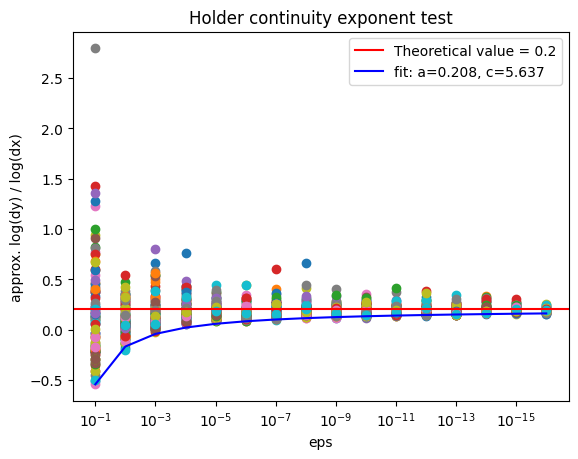

In [ ]:
# Test 2: Hölder continuity exponent

alpha = 0.2

n = 100
eps = np.array([
    1e-1, 1e-2, 1e-3, 1e-4, 
    1e-5, 1e-6, 1e-7, 1e-8, 
1e-9, 1e-10, 1e-11, 1e-12, 
1e-13, 1e-14, 1e-15, 1e-16, 
# 1e-17, 1e-18, 1e-19, 1e-20
])
m = len(eps)
x = np.random.rand(n) * 0.8 + 0.1
dx = eps
x1 = np.tile(x, (m,1)) - np.tile(dx/2, (n,1)).T
x2 = np.tile(x, (m,1)) + np.tile(dx/2, (n,1)).T
y1 = np.vectorize(process)(x1)
y2 = np.vectorize(process)(x2)
dy = y2 - y1
a = np.log(np.abs(dy)) / np.tile(np.log(np.abs(dx)), (n,1)).T
plt.plot(eps, a, 'o', 
) # should not converge
#log scale
plt.xscale('log')
# plt.yscale('log')
# invert x axis
plt.gca().invert_xaxis()
# draw horizontal line at y=0.5
plt.axhline(y=alpha, color='r', linestyle='-', label = f'Theoretical value = {alpha}')

plt.title('Holder continuity exponent test')
plt.xlabel('eps')
plt.ylabel('approx. log(dy) / log(dx)')
plt.legend()

# curve fitting
inf_a = np.min(a, axis=1)
# fit a curve
from scipy.optimize import curve_fit
def func(eps, a, c):
    return a + np.log(c) / (np.log(eps))
xdata = eps
ydata = inf_a
popt, pcov = curve_fit(func, xdata, ydata)
# plt.plot(xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'b-',
label='fit: a=%5.3f, c=%5.3f' % tuple(popt))
# plt.xscale('log')
# plt.yscale('log')
# invert x axis
# plt.gca().invert_xaxis()
# draw horizontal line at y=0.5

plt.legend()
plt.show()

Text(0.5, 1.0, 'Weierstrass function, alpha = 0.2')

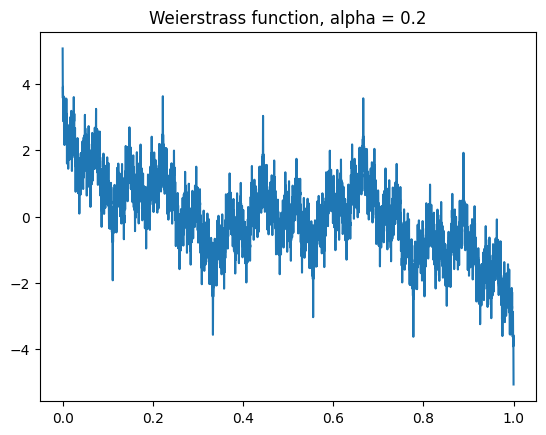

In [ ]:
# Plot the process
x = np.linspace(0,1,10000)
y = np.vectorize(process)(x)
plt.plot(x,y)
plt.title(f'Weierstrass function, alpha = {alpha}')

## Test Applied to SSRW

In [1]:
def process(x: float) -> float:
    return 2*x

def ssrw_process(x:float) -> float:
    if x < 0: 
        raise ValueError('x must be in [0,1]')
    if x > 1:
        raise ValueError('x must be in [0,1]')
    x = x # fix zero devision
    return W[int(x*NW)-1]*(NW)**(-1/2)

alpha = 0.7
def weierstrass(x,Nvar = 200):
    we=0
    
    b = 3
    for n in range(0,Nvar):
        we=we+np.cos(b**n*np.pi*x)/b**(n* alpha)
    return we

process = ssrw_process
# We use the weierstrass function as a test case.
# It is continuous, not differentiable, and does
# not have other properties of BM such as normality
# and memorylessness.

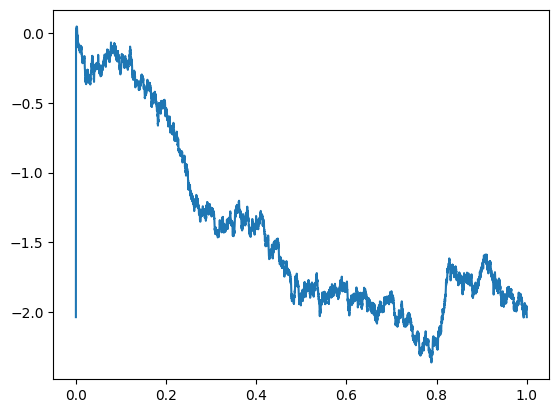

In [ ]:
# Plot the process
x = np.linspace(0,1,10000)
y = np.vectorize(process)(x)
plt.plot(x,y)
# plt.title(f'Weierstrass function, alpha = {alpha}')

<ipython-input-158-9c4a45f3ddde>:22: RuntimeWarning: divide by zero encountered in log
  a = np.log(np.abs(dy)) / np.tile(np.log(np.abs(dx)), (n,1)).T
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


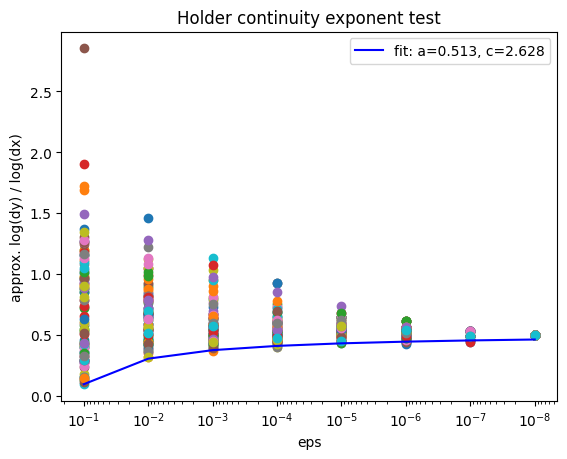

In [ ]:
# Test 2: Hölder continuity exponent

# alpha = 0.2

n = 100
eps = np.array([
    1e-1, 1e-2, 1e-3, 1e-4, 
    1e-5, 1e-6, 1e-7, 1e-8, 
# 1e-9, 1e-10, 1e-11, 1e-12, 
# 1e-13, 1e-14, 1e-15, 1e-16, 
# 1e-17, 1e-18, 1e-19, 1e-20
])
m = len(eps)
x = np.random.rand(n) * 0.8 + 0.1
dx = eps
x1 = np.tile(x, (m,1)) - np.tile(dx/2, (n,1)).T
x2 = np.tile(x, (m,1)) + np.tile(dx/2, (n,1)).T
y1 = np.vectorize(process)(x1)
y2 = np.vectorize(process)(x2)
dy = y2 - y1
a = np.log(np.abs(dy)) / np.tile(np.log(np.abs(dx)), (n,1)).T
plt.plot(eps, a, 'o', 
) # should not converge
#log scale
plt.xscale('log')
# plt.yscale('log')
# invert x axis
plt.gca().invert_xaxis()
# draw horizontal line at y=0.5
# plt.axhline(y=alpha, color='r', linestyle='-', label = f'Theoretical value = {alpha}')

plt.title('Holder continuity exponent test')
plt.xlabel('eps')
plt.ylabel('approx. log(dy) / log(dx)')
plt.legend()

# curve fitting
inf_a = np.min(a, axis=1)
# fit a curve
from scipy.optimize import curve_fit
def func(eps, a, c):
    return a + np.log(c) / (np.log(eps))
xdata = eps
ydata = inf_a
popt, pcov = curve_fit(func, xdata, ydata)
# plt.plot(xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'b-',
label='fit: a=%5.3f, c=%5.3f' % tuple(popt))
# plt.xscale('log')
# plt.yscale('log')
# invert x axis
# plt.gca().invert_xaxis()
# draw horizontal line at y=0.5

plt.legend()
plt.show()

<ipython-input-162-445e2f3dfc45>:22: RuntimeWarning: divide by zero encountered in log
  a = np.log(np.abs(dy)) / np.tile(np.log(np.abs(dx)), (n,1)).T
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


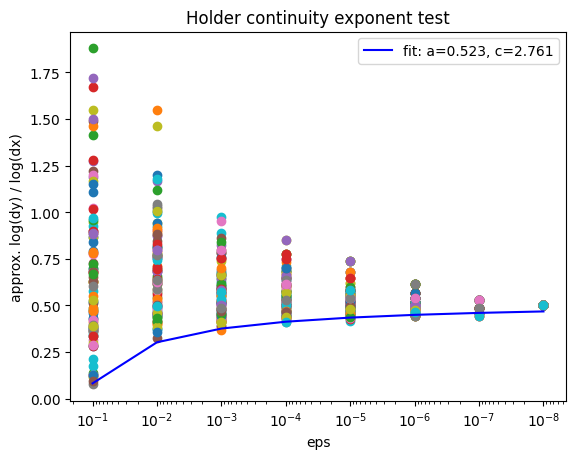

In [ ]:
# Test 2: Hölder continuity exponent

# alpha = 0.2

n = 100
eps = np.array([
    1e-1, 1e-2, 1e-3, 1e-4, 
    1e-5, 1e-6, 1e-7, 1e-8, 
# 1e-9, 1e-10,# 1e-11, 1e-12, 
# 1e-13, 1e-14, 1e-15, 1e-16, 
# 1e-17, 1e-18, 1e-19, 1e-20
])
m = len(eps)
x = np.random.rand(n) * 0.8 + 0.1
dx = eps
x1 = np.tile(x, (m,1)) - np.tile(dx/2, (n,1)).T
x2 = np.tile(x, (m,1)) + np.tile(dx/2, (n,1)).T
y1 = np.vectorize(process)(x1)
y2 = np.vectorize(process)(x2)
dy = y2 - y1
a = np.log(np.abs(dy)) / np.tile(np.log(np.abs(dx)), (n,1)).T
plt.plot(eps, a, 'o', 
) # should not converge
#log scale
plt.xscale('log')
# plt.yscale('log')
# invert x axis
plt.gca().invert_xaxis()
# draw horizontal line at y=0.5
# plt.axhline(y=alpha, color='r', linestyle='-', label = f'Theoretical value = {alpha}')

plt.title('Holder continuity exponent test')
plt.xlabel('eps')
plt.ylabel('approx. log(dy) / log(dx)')
plt.legend()

# curve fitting
inf_a = np.min(a, axis=1)
# fit a curve
from scipy.optimize import curve_fit
def func(eps, a, c):
    return a + np.log(c) / (np.log(eps))
xdata = eps
ydata = inf_a
popt, pcov = curve_fit(func, xdata, ydata)
# plt.plot(xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'b-',
label='fit: a=%5.3f, c=%5.3f' % tuple(popt))
# plt.xscale('log')
# plt.yscale('log')
# invert x axis
# plt.gca().invert_xaxis()
# draw horizontal line at y=0.5

plt.legend()
plt.show()

<ipython-input-163-445e2f3dfc45>:22: RuntimeWarning: divide by zero encountered in log
  a = np.log(np.abs(dy)) / np.tile(np.log(np.abs(dx)), (n,1)).T
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


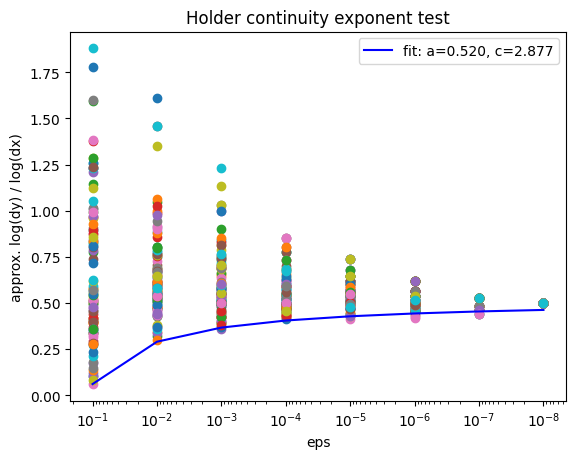

In [ ]:
# Test 2: Hölder continuity exponent

# alpha = 0.2

n = 100
eps = np.array([
    1e-1, 1e-2, 1e-3, 1e-4, 
    1e-5, 1e-6, 1e-7, 1e-8, 
# 1e-9, 1e-10,# 1e-11, 1e-12, 
# 1e-13, 1e-14, 1e-15, 1e-16, 
# 1e-17, 1e-18, 1e-19, 1e-20
])
m = len(eps)
x = np.random.rand(n) * 0.8 + 0.1
dx = eps
x1 = np.tile(x, (m,1)) - np.tile(dx/2, (n,1)).T
x2 = np.tile(x, (m,1)) + np.tile(dx/2, (n,1)).T
y1 = np.vectorize(process)(x1)
y2 = np.vectorize(process)(x2)
dy = y2 - y1
a = np.log(np.abs(dy)) / np.tile(np.log(np.abs(dx)), (n,1)).T
plt.plot(eps, a, 'o', 
) # should not converge
#log scale
plt.xscale('log')
# plt.yscale('log')
# invert x axis
plt.gca().invert_xaxis()
# draw horizontal line at y=0.5
# plt.axhline(y=alpha, color='r', linestyle='-', label = f'Theoretical value = {alpha}')

plt.title('Holder continuity exponent test')
plt.xlabel('eps')
plt.ylabel('approx. log(dy) / log(dx)')
plt.legend()

# curve fitting
inf_a = np.min(a, axis=1)
# fit a curve
from scipy.optimize import curve_fit
def func(eps, a, c):
    return a + np.log(c) / (np.log(eps))
xdata = eps
ydata = inf_a
popt, pcov = curve_fit(func, xdata, ydata)
# plt.plot(xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'b-',
label='fit: a=%5.3f, c=%5.3f' % tuple(popt))
# plt.xscale('log')
# plt.yscale('log')
# invert x axis
# plt.gca().invert_xaxis()
# draw horizontal line at y=0.5

plt.legend()
plt.show()

<ipython-input-164-445e2f3dfc45>:22: RuntimeWarning: divide by zero encountered in log
  a = np.log(np.abs(dy)) / np.tile(np.log(np.abs(dx)), (n,1)).T
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


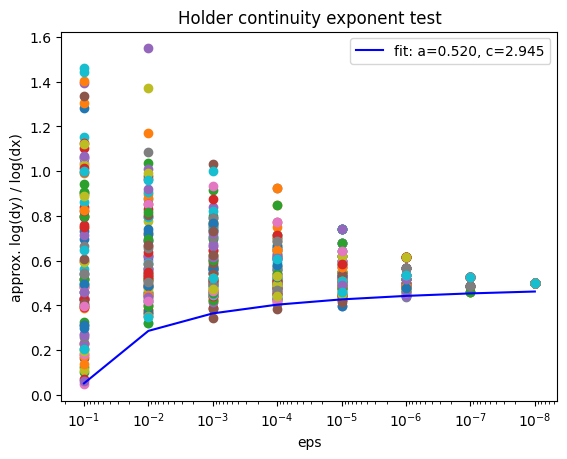

In [ ]:
# Test 2: Hölder continuity exponent

# alpha = 0.2

n = 100
eps = np.array([
    1e-1, 1e-2, 1e-3, 1e-4, 
    1e-5, 1e-6, 1e-7, 1e-8, 
# 1e-9, 1e-10,# 1e-11, 1e-12, 
# 1e-13, 1e-14, 1e-15, 1e-16, 
# 1e-17, 1e-18, 1e-19, 1e-20
])
m = len(eps)
x = np.random.rand(n) * 0.8 + 0.1
dx = eps
x1 = np.tile(x, (m,1)) - np.tile(dx/2, (n,1)).T
x2 = np.tile(x, (m,1)) + np.tile(dx/2, (n,1)).T
y1 = np.vectorize(process)(x1)
y2 = np.vectorize(process)(x2)
dy = y2 - y1
a = np.log(np.abs(dy)) / np.tile(np.log(np.abs(dx)), (n,1)).T
plt.plot(eps, a, 'o', 
) # should not converge
#log scale
plt.xscale('log')
# plt.yscale('log')
# invert x axis
plt.gca().invert_xaxis()
# draw horizontal line at y=0.5
# plt.axhline(y=alpha, color='r', linestyle='-', label = f'Theoretical value = {alpha}')

plt.title('Holder continuity exponent test')
plt.xlabel('eps')
plt.ylabel('approx. log(dy) / log(dx)')
plt.legend()

# curve fitting
inf_a = np.min(a, axis=1)
# fit a curve
from scipy.optimize import curve_fit
def func(eps, a, c):
    return a + np.log(c) / (np.log(eps))
xdata = eps
ydata = inf_a
popt, pcov = curve_fit(func, xdata, ydata)
# plt.plot(xdata, ydata)
plt.plot(xdata, func(xdata, *popt), 'b-',
label='fit: a=%5.3f, c=%5.3f' % tuple(popt))
# plt.xscale('log')
# plt.yscale('log')
# invert x axis
# plt.gca().invert_xaxis()
# draw horizontal line at y=0.5

plt.legend()
plt.show()

# Error analysis

<ipython-input-181-d574b0e24299>:22: RuntimeWarning: divide by zero encountered in log
  a = np.log(np.abs(dy)) / np.tile(np.log(np.abs(dx)), (n,1)).T


(array([ 1.,  0.,  2.,  3.,  6.,  9., 14., 15., 21., 30., 25., 25., 18.,
         7., 11.,  7.,  5.,  0.,  0.,  1.]),
 array([0.4878425 , 0.49021075, 0.49257901, 0.49494727, 0.49731553,
        0.49968378, 0.50205204, 0.5044203 , 0.50678855, 0.50915681,
        0.51152507, 0.51389333, 0.51626158, 0.51862984, 0.5209981 ,
        0.52336636, 0.52573461, 0.52810287, 0.53047113, 0.53283938,
        0.53520764]),
 <BarContainer object of 20 artists>)

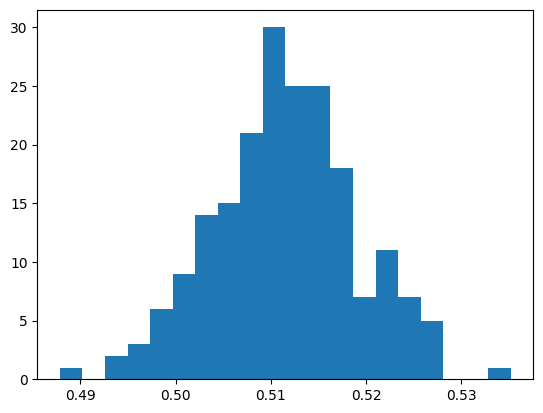

In [ ]:
x = np.array([plot_and_fit() for _ in range(200)])
plt.hist(x[:,0], bins = 20)